# Lab 2 - W203 - Statistics for Data Science

#### Submission by Jude Kavalam, Harshit Patel, Abhi Sharma

## Install packages

In [37]:
install.packages("dplyr")
library(dplyr)
install.packages("car")
library(car)
install.packages("lmtest")
library(lmtest)
install.packages("sandwich")
library(sandwich)
install.packages("corrplot")
library(corrplot)
install.packages("stargazer")
library(stargazer)
# set standard height and width for images displayed
options(repr.plot.width=5, repr.plot.height=5)


Warning message:
"package 'dplyr' is in use and will not be installed"Warning message:
"package 'car' is in use and will not be installed"Warning message:
"package 'lmtest' is in use and will not be installed"Warning message:
"package 'sandwich' is in use and will not be installed"Warning message:
"package 'corrplot' is in use and will not be installed"Warning message:
"package 'stargazer' is in use and will not be installed"

## Get Data

In [3]:
get_data = function() {
    wd = getwd()
    return (read.csv(paste(wd, "/", "crime_v2.csv", sep="")))    
}

In [4]:
data = get_data()
head(data)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
2,3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
3,5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
4,7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
5,9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
6,11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [5]:
dim(data)

[1] 97 25

In [6]:
sapply(data, class)

county      year    crmrte    prbarr   prbconv   prbpris    avgsen     polpc 
"integer" "integer" "numeric" "numeric"  "factor" "numeric" "numeric" "numeric" 
  density     taxpc      west   central     urban  pctmin80      wcon      wtuc 
"numeric" "numeric" "integer" "integer" "integer" "numeric" "numeric" "numeric" 
     wtrd      wfir      wser      wmfg      wfed      wsta      wloc       mix 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
  pctymle 
"numeric"

#### We notice there is a factor column for prbconv, we convert this to numeric, as has been done with prbarr and prbpris

In [7]:
data$prbconv = as.numeric(data$prbconv)

In [8]:
sapply(data, class)

county      year    crmrte    prbarr   prbconv   prbpris    avgsen     polpc 
"integer" "integer" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
  density     taxpc      west   central     urban  pctmin80      wcon      wtuc 
"numeric" "numeric" "integer" "integer" "integer" "numeric" "numeric" "numeric" 
     wtrd      wfir      wser      wmfg      wfed      wsta      wloc       mix 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
  pctymle 
"numeric"

In [9]:
# the row numbers that have atleast 1 negative value in the columns
unique(unlist (lapply (data, function (x) which (x < 0))))

integer(0)

In [10]:
# the row numbers that have atleast 1 NA value in the columns
unique(unlist (lapply (data, function (x) which (is.na (x)))))

[1] 92 93 94 95 96 97

In [11]:
data[92:97,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
92,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,2,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [12]:
# we observe all values have NA in them
# remove data where there are NA in rows
data = data[complete.cases(data), ]

In [13]:
dim(data)

[1] 91 25

## Introduction

There are 3 classes of variables provided to us:
1. Labor market variables
2. Criminal justice variables
3. Demographic variables

Both labor market and criminal justice strategies should be relevant in influencing (causing causal behavior on) crime rate. 

In our study, we are given variables that reflect both these factors:<br/>
**Variables reflecting labor markets**

10 taxpc	tax revenue per capita <br/>
15 wcon	weekly wage, construction <br/>
16 wtuc	- wkly wge, trns, util, commun <br/>
17 wtrd	- wkly wge, whlesle, retail trade <br/>
18 wfir	- wkly wge, fin, ins, real est <br/>
19 wser	- wkly wge, service industry <br/>
20 wmfg	- wkly wge, manufacturing <br/>
21 wfed	- wkly wge, fed employees <br/>
22 wsta	- wkly wge, state employees <br/>
23 wloc	- wkly wge, local gov emps <br/>

**Variables reflecting criminal justice system**

4 prbarr - 'probability' of arrest <br/>
5 prbconv - 'probability' of conviction <br/>
6 prbpris - 'probability' of prison sentence <br/>
7 avgsen - avg. sentence, days <br/>
8 polpc - police per capita <br/>

There is a third class of variables that represents the demographic characteristics of the data. We expect some of these variables to have a causal effect on crime rate (say pctymle or pctmin80), but others to not intrinsically have causal effects on crime rate (say west, central, county).

These variables can also possibly influence the "labor market" and "criminal justice system" variables:<br/>

**Variables reflecting demographic characteristics**

1 county - county identifier <br/>
9 density - people per sq. mile <br/>
11 west - =1 if in western N.C. <br/>
12 central - =1 if in central N.C. <br/>
13 urban - =1 if in SMSA <br/>
14 pctmin80 - perc. minority, 1980 <br/>
24 mix - offense mix: face-to-face/other <br/>
25 pctymle - percent young male <br/>

Our target variable is "crmrte", and we're trying to understand what affects this variable (or a transform of this variable)

### EDA Target Variable

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020927 0.029986 0.033400 0.039642 0.098966 

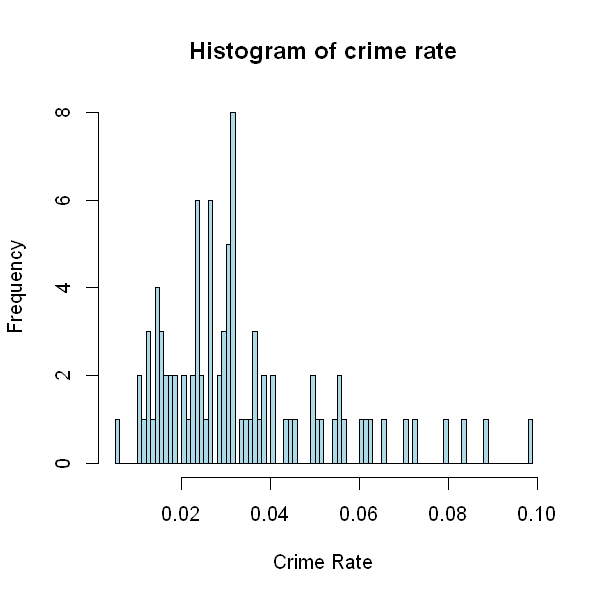

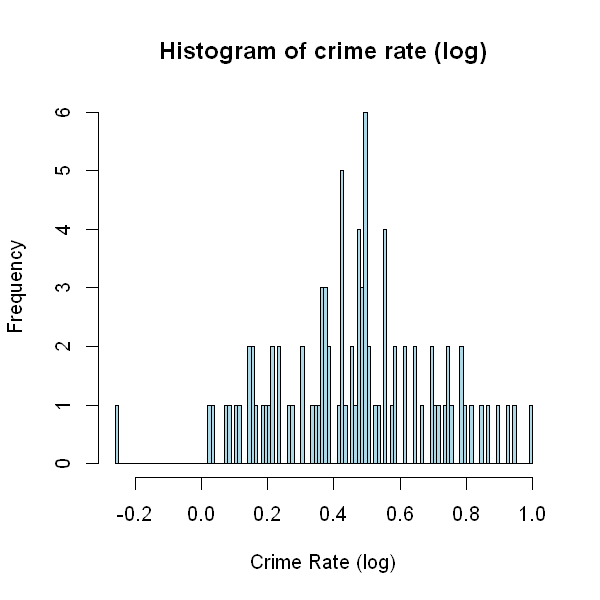

In [14]:
summary(data$crmrte)
hist(data$crmrte, breaks=100, main = "Histogram of crime rate", xlab = "Crime Rate", col = "lightblue", border = "black")
hist(log10(data$crmrte * 100), breaks=100, main = "Histogram of crime rate (log)", xlab = "Crime Rate (log)", col = "lightblue", border = "black")

#### Note that if we take a scaled version of the crime rate (scaled by a factor of 100), we get a nice normally distributed curve 

### EDA Geographical Variables (Demographic)

**One thing to consider would be to consider the effects of geography on crime rate.**

There are 3 variables which help us categorize geography - west, central and urban. These are all dummy variables that represent what region characteristics the data point has. Hence, one variable of interest could be an interaction variable: 

#### geo = west * central * urban

Note that because we include this new interaction variable, we have to include all lower order interactions as well.

We don't have a hypothesis around geography, but one can make an argument that urban areas are more susceptible for crime, given that they may be more densely populated (see graph below for plot between urban and density)

In [15]:
data$geo = data$west * data$central * data$urban
data$west_central = data$west * data$central
data$west_urban = data$west * data$urban
data$central_urban = data$central * data$urban

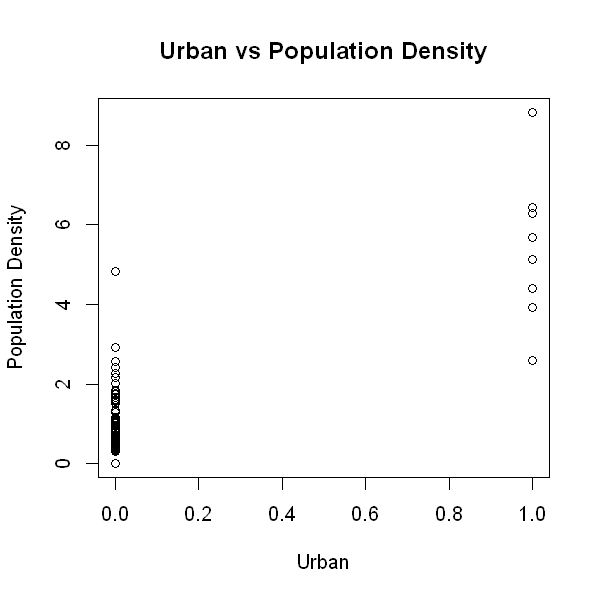

In [16]:
plot(data$urban, data$density, main = "Urban vs Population Density", xlab = "Urban", ylab = "Population Density" )

In [17]:
# sample EDA for the dummy variables
summary(data$urban)
unique(data$urban)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.08791 0.00000 1.00000 

[1] 0 1

In [18]:
# Analysis of interaction term "geo"
paste("Urban:", sum(data$urban))
paste("West:", sum(data$west))
paste("Central:", sum(data$central))

paste("Central + West:", sum(data$central * data$west))
paste("Central + Urban:", sum(data$central * data$urban))
paste("Urban + West:", sum(data$urban * data$west))

paste("Urban + West + Central:", sum(data$urban * data$west * data$central))

[1] "Urban: 8"

[1] "West: 23"

[1] "Central: 34"

[1] "Central + West: 1"

[1] "Central + Urban: 5"

[1] "Urban + West: 1"

[1] "Urban + West + Central: 0"

**For now, we will include the geo variable in our model to observe if there are any special effects on crime based on geo**

### EDA Population Variables (Demographic)

We decide to add 2 interaction variables:
1. density * pctymle * 1.0 / 100 - this gives the density of young males in the county (density_ymle)
2. density * pctmin80 * 1.0 / 100 - this gives the density of minority in the county (density_min80)

In [19]:
data$density_min80 = data$density * data$pctmin80 * 1.0 / 100
data$density_ymle = data$density * data$pctymle * 1.0 / 100

2.4226327,20.21870,0.07787097,0.489824846,0.0018865276
1.0463320,7.91632,0.08260694,0.082830988,0.0008643429
0.4127659,3.16053,0.07211538,0.013045592,0.0002976677
0.4915572,47.91610,0.07353726,0.235535043,0.0003614777
0.5469484,1.79619,0.07069755,0.009824232,0.0003866791
0.6113361,1.54070,0.09891920,0.009418854,0.0006047287


$r
       [,1]   [,2] [,3]   [,4]   [,5]
[1,]  1.000 -0.016 0.29 -0.069 -0.045
[2,] -0.016  1.000 0.15  0.120  0.390
[3,]  0.290  0.150 1.00  0.890  0.880
[4,] -0.069  0.120 0.89  1.000  0.950
[5,] -0.045  0.390 0.88  0.950  1.000

$p
       [,1]    [,2]    [,3]    [,4]    [,5]
[1,] 0.0000 0.88000 5.2e-03 5.2e-01 6.7e-01
[2,] 0.8800 0.00000 1.7e-01 2.7e-01 1.4e-04
[3,] 0.0052 0.17000 0.0e+00 2.9e-32 1.5e-30
[4,] 0.5200 0.27000 2.9e-32 0.0e+00 1.2e-46
[5,] 0.6700 0.00014 1.5e-30 1.2e-46 0.0e+00

$sym
              
[1,] 1        
[2,]   1      
[3,]     1    
[4,]     + 1  
[5,]   . + * 1
attr(,"legend")
[1] 0 ' ' 0.3 '.' 0.6 ',' 0.8 '+' 0.9 '*' 0.95 'B' 1


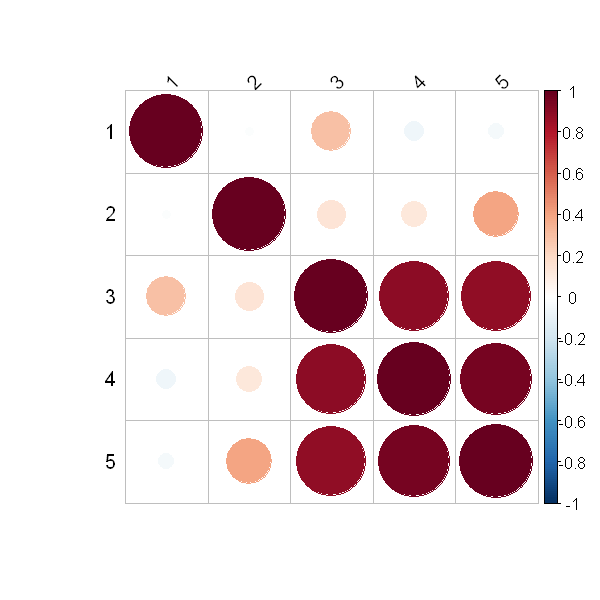

In [21]:
popdata = cbind(data$density, data$pctmin80, data$pctymle, data$density_min80, data$density_ymle)
head(popdata)
source("http://www.sthda.com/upload/rquery_cormat.r")
rquery.cormat(popdata, type="full")

#### We observe strong positive correlation between several population variables

Notably:
1. 0.39 between pctmin80 and density_ymale
2. 0.89 between pctymle and density_min80
3. 0.88 between pctymle and density_ymle
4. 0.95 between density_min80 and density_ymle

We will include these variables in our specifications with the following expected causal effects:
1. If density is high, then crime rate is expected to be high. This is simply because a larger set of people in one area is bound to create more conflict and crime in the community.
2. If percentage of young males are high in a region, we expect more crime. This is because younger people are easier to influence and may engage more in petty crimes.

There may be a concern including both density_min80 and density_ymle because they have high correlation (0.95) - leading to possible multicollinearity

**For now, we will include "density", "pctmin80" and one of "density_ymle" or "density_min80" variables in the model to observe their effects**

### EDA Criminal Justice Variables

It is worthwhile to capture any relationships between these variables: prbarr, prbconv, prbpris.

This will help us determine if there is any multicollinearity between these variables. We would suspect these to be correlated

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1500  0.3648  0.4234  0.4108  0.4568  0.6000 

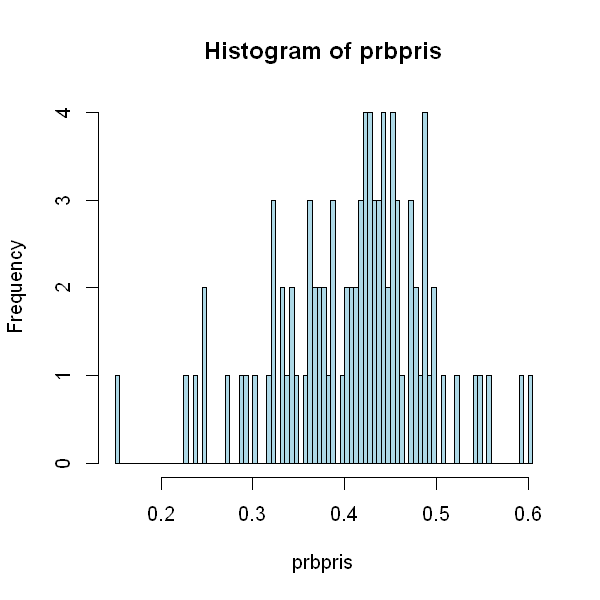

In [22]:
summary(data$prbpris)
hist((data$prbpris), breaks=100, main = "Histogram of prbpris", xlab = "prbpris", col = "lightblue", border = "black")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091 

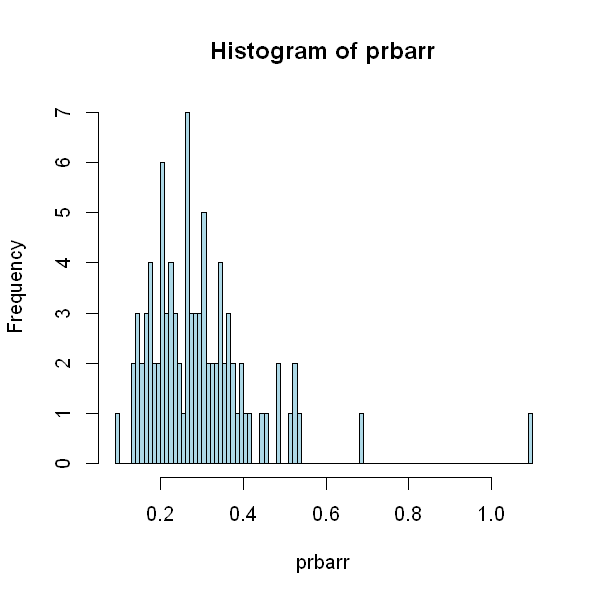

In [23]:
summary(data$prbarr)
hist((data$prbarr), breaks=100, main = "Histogram of prbarr", xlab = "prbarr", col = "lightblue", border = "black")

#### Notice that there is an outlier row with a probability higher than 1, which is not possible. We will exclude this from our analysis

In [24]:
n = unique(unlist (lapply (data, function (x) which (data$prbarr > 1))))
n

[1] 51

In [25]:
data[n,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wsta,wloc,mix,pctymle,geo,west_central,west_urban,central_urban,density_min80,density_ymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
51,115,87,0.0055332,1.09091,90,0.5,20.7,0.00905433,0.3858093,28.1931,...,340.39,386.12,0.1,0.07253495,0,0,0,0,0.004952441,0.0002798466


In [26]:
data = data[-n,]
dim(data)
# summary(data$prbarr)
# hist((data$prbarr), breaks=100, main = "Histogram of prbarr", xlab = "prbarr", col = "lightblue", border = "black")

[1] 90 31

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   25.25   47.50   47.28   69.75   92.00 

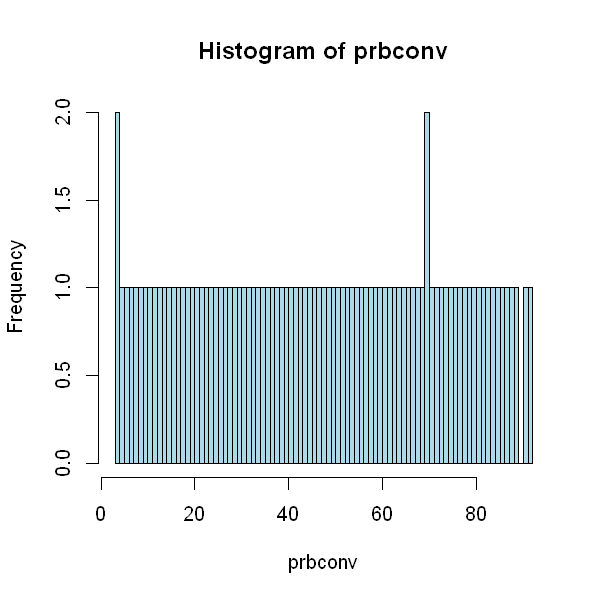

In [27]:
summary(data$prbconv)
hist((data$prbconv), breaks=100, main = "Histogram of prbconv", xlab = "prbconv", col = "lightblue", border = "black")

#### Notice that prbconv is > 1 even though it is supposed to be a probability. We believe the column is being represented as percentage.

Hence to remedy the issue, we will divide this column by 100 to get the equivalent probability

In [28]:
data$prbconv = data$prbconv * 1.0 / 100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0300  0.2525  0.4750  0.4728  0.6975  0.9200 

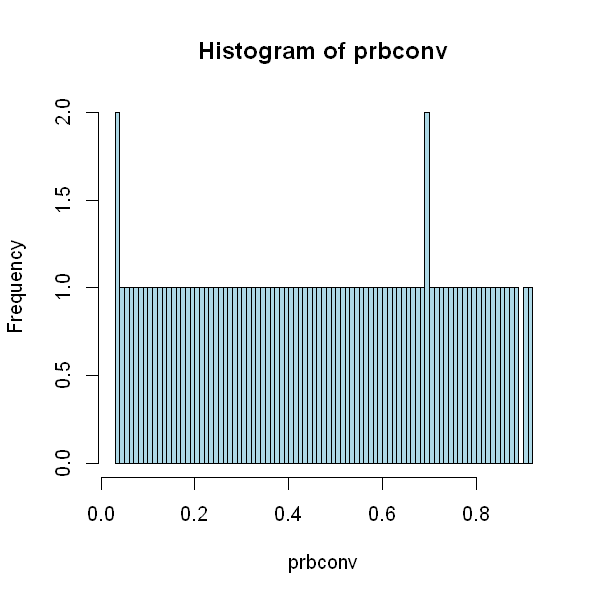

In [29]:
summary(data$prbconv)
hist((data$prbconv), breaks=100, main = "Histogram of prbconv", xlab = "prbconv", col = "lightblue", border = "black")

#### Its interesting to note that prbconv is follows an almost exact uniform distribution

#### Now that we have the data in the right format, we find correlation between the 3 probabilities, along with average sentence and police per capita

0.298270,0.63,0.436170,6.71,0.00182786
0.132029,0.89,0.450000,6.35,0.00074588
0.444444,0.13,0.600000,6.76,0.00123431
0.364760,0.62,0.435484,7.14,0.00152994
0.518219,0.52,0.442623,8.22,0.00086018
0.524664,0.03,0.500000,13.00,0.00288203


$r
       [,1]   [,2]   [,3]   [,4]   [,5]
[1,]  1.000  0.018 -0.230 -0.044 -0.270
[2,]  0.018  1.000 -0.035 -0.160 -0.075
[3,] -0.230 -0.035  1.000 -0.100 -0.120
[4,] -0.044 -0.160 -0.100  1.000  0.300
[5,] -0.270 -0.075 -0.120  0.300  1.000

$p
      [,1] [,2]  [,3]   [,4]   [,5]
[1,] 0.000 0.87 0.027 0.6800 0.0100
[2,] 0.870 0.00 0.750 0.1300 0.4800
[3,] 0.027 0.75 0.000 0.3400 0.2400
[4,] 0.680 0.13 0.340 0.0000 0.0046
[5,] 0.010 0.48 0.240 0.0046 0.0000

$sym
              
[1,] 1        
[2,]   1      
[3,]     1    
[4,]       1  
[5,]         1
attr(,"legend")
[1] 0 ' ' 0.3 '.' 0.6 ',' 0.8 '+' 0.9 '*' 0.95 'B' 1


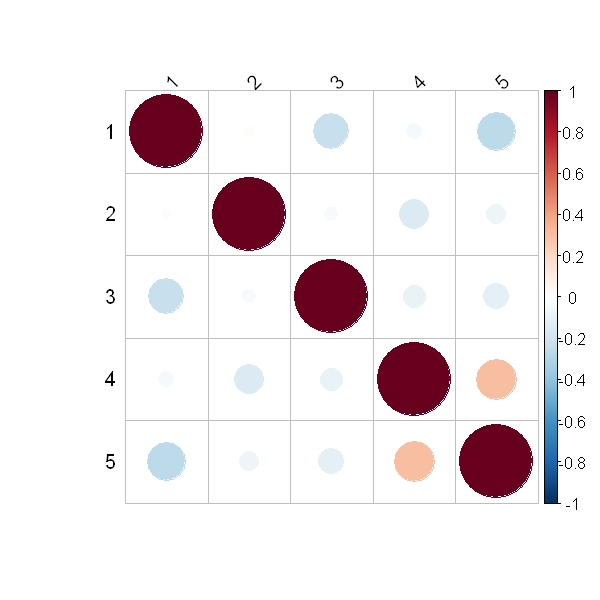

In [30]:
probdata = cbind(data$prbarr, data$prbconv, data$prbpris, data$avgsen, data$polpc)
head(probdata)
source("http://www.sthda.com/upload/rquery_cormat.r")
rquery.cormat(probdata, type="full")

**Correlation Analysis**

1. Interestingly, there is little correlation between the probability variables, except for weak negative correlation (-0.23) between prbarr and prbpris
2. There is also weak negative correlation between prbarr and polpc (-0.27)
3. Finally, there is weak positive correlation between polpc and avgsen (0.3)

**For now, we will consider all 3 probability variables in the model**

We expect that as any of probabilities of arrest or conviction or prison sentence go up, crime rate should come down (people would be less risk taking to commit crime if they knew they would be likely arrested / convicted / imprisoned). 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.380   7.330   9.045   9.524  11.320  17.410 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007459 0.0012291 0.0014818 0.0016205 0.0018587 0.0044592 

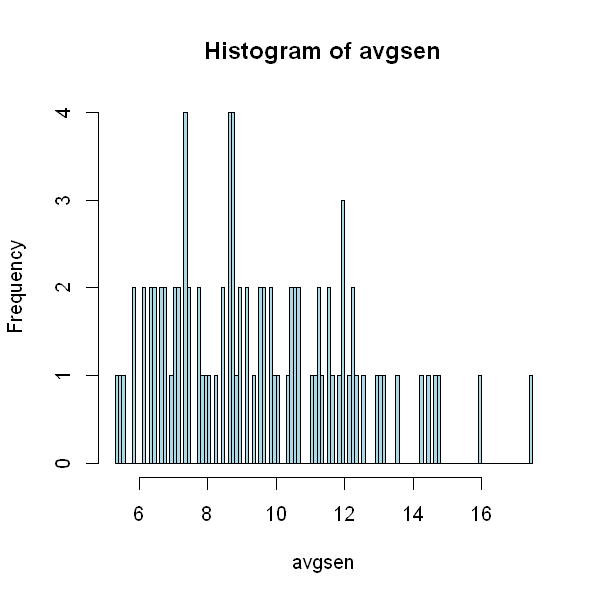

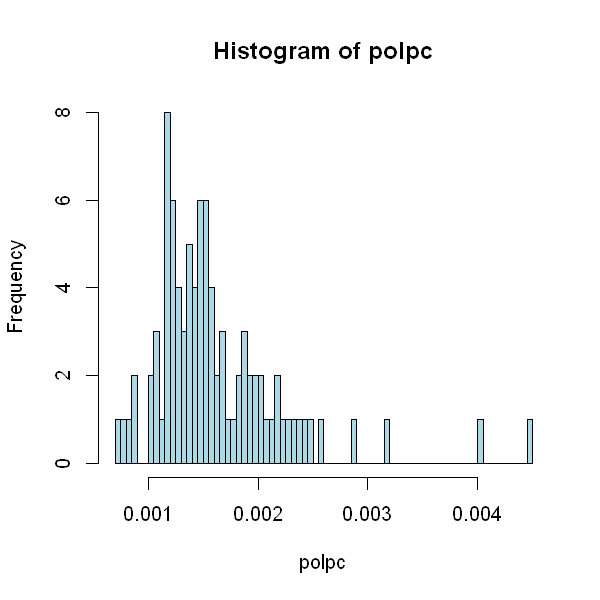

In [31]:
# Finally there's nothing special about the avgsen and polpc variables.

# They have values within range and don't display special distributions
summary(data$avgsen)
hist(data$avgsen, breaks=100, main = "Histogram of avgsen", xlab = "avgsen", col = "lightblue", border = "black")

# Taking log10(avgsen) makes the histogram look slightly more normal, but we will use avgsen as is in the model for now.
# hist(log10(data$avgsen), breaks=100, main = "Histogram of avgsen", xlab = "avgsen", col = "lightblue", border = "black")

summary(data$polpc)
hist(data$polpc, breaks=100, main = "Histogram of polpc", xlab = "polpc", col = "lightblue", border = "black")

**There seem to be a few suspicious far right outliers for police per capita and average sentence days**

We will deal with them as appropriate when evaluating the cook's distance for potential points of influence.

We cannot make a judgement for the causal effect of polpc (police per capita). If this increases, we can make an argument that crimes may go down as there is "more policing" per citizen. We can also say, if polpc goes up, then crime rate goes up (police can find trivial reasons to arrest citizens).

We can however, likely say, if avgsen (average sentence in days) goes up, then convicts may become may learn their lessons and not commit crimes the next time around, so crime rate decreases.

**For now, we will include both variables, as is in the model specification**

### EDA Labor Market Variables

30.99368,281.4259,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91
26.89208,255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47
34.81605,226.9470,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37
42.94759,375.2345,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03
28.05474,292.3077,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82
35.22974,250.4006,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22


$r
          [,1]  [,2]     [,3]  [,4]   [,5]  [,6]   [,7]  [,8]   [,9]  [,10]
 [1,]  1.00000 0.190 -0.00058 0.240 -0.027 0.170 -0.150 0.061 -0.035  0.036
 [2,]  0.19000 1.000  0.64000 0.620  0.510 0.540  0.400 0.520  0.058  0.021
 [3,] -0.00058 0.640  1.00000 0.670  0.570 0.610  0.360 0.360  0.170 -0.018
 [4,]  0.24000 0.620  0.67000 1.000  0.500 0.570  0.330 0.490  0.130  0.015
 [5,] -0.02700 0.510  0.57000 0.500  1.000 0.590  0.440 0.380  0.250 -0.016
 [6,]  0.17000 0.540  0.61000 0.570  0.590 1.000  0.320 0.420  0.240  0.085
 [7,] -0.15000 0.400  0.36000 0.330  0.440 0.320  1.000 0.450  0.170 -0.016
 [8,]  0.06100 0.520  0.36000 0.490  0.380 0.420  0.450 1.000  0.280  0.011
 [9,] -0.03500 0.058  0.17000 0.130  0.250 0.240  0.170 0.280  1.000  0.074
[10,]  0.03600 0.021 -0.01800 0.015 -0.016 0.085 -0.016 0.011  0.074  1.000

$p
       [,1]    [,2]    [,3]    [,4]    [,5]    [,6]    [,7]    [,8]   [,9]
 [1,] 0.000 8.0e-02 1.0e+00 2.4e-02 8.0e-01 9.9e-02 1.5e-01 5.7e-01 0.7500
 [2,] 0

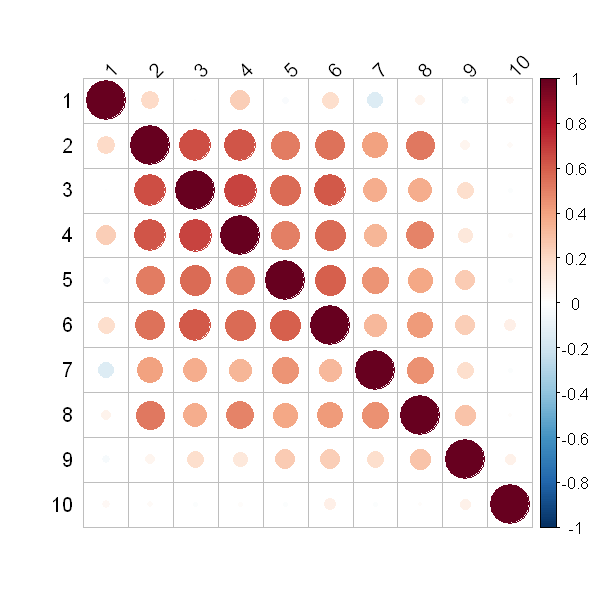

In [32]:
labmktdata = cbind(data$taxpc, data$wcon, data$wtuc, data$wtrd, data$wfir, data$wser, data$wmfg, data$wfed, data$wsta, data$wloc)
head(labmktdata)
source("http://www.sthda.com/upload/rquery_cormat.r")
rquery.cormat(labmktdata, type="full")


As expected, due to labor and market interdependencies, a lot of the wages of workers in the city are correlated with others.

Note that while there is strong positive correlation (> 0.6), there is no perfect multicollinearity amongst these variables

Tax revenues are hardly correlated with any of the wages, this is a little surprising! Although we do see weak correlation between taxes and certain industries.

One variable of interest could be the total weekly wages:
**wtotal = wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc**

The argument is that if the total wages are high for a county, then the crime rate will be low (as the county is prosperous, so robberies and money related crimes would be fewer)

In [33]:
data$wtotal = data$wcon + data$wtuc + data$wtrd + data$wfir + data$wser + data$wmfg + data$wfed + data$wsta + data$wloc

[1] 0.2369857

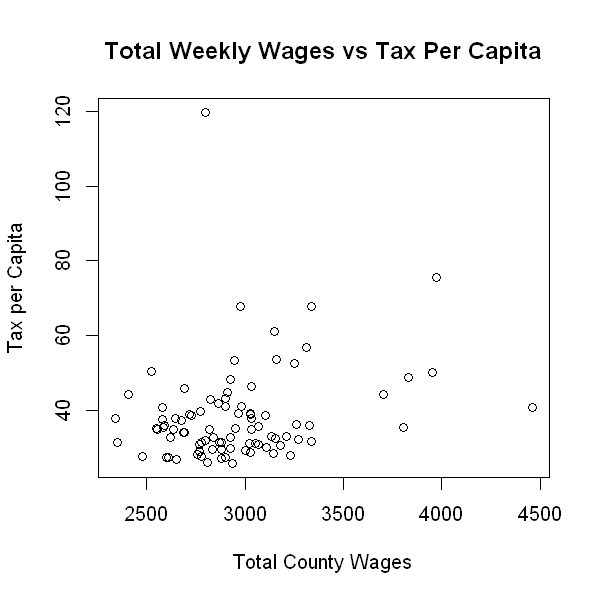

In [34]:
plot(data$wtotal, data$taxpc, main = "Total Weekly Wages vs Tax Per Capita", xlab = "Total County Wages", ylab = "Tax per Capita")
cor(data$wtotal, data$taxpc)

## Assumptions of Multiple Linear Regression

1. Parameters are linear
2. No perfect multicollinearity
3. IID / Random sample of observations in dataset
4. Zero conditional mean, ie, E[u|X] = 0 (or weaker assumption of exogeneity, E(u) = 0 and Cov(X, u) = 0)
5. Homoskedastic errors, Var(u|X) = const
6. Normality of errors ~ N(0, sigma^2)

MLR 1-4 implies unbiased OLS estimators (beta coefficients) <br/>
MLR 1-5 (Gauss markov) implies OLS estimators are BLUE <br/>
MLR 1-6 (Classical LM assumptions) implies OLS estimators, ie, beta_j ~ N(beta_j, var(beta_j)) - var(beta_j) given by white standard errors

## Model Building

Our target variable is log10(crmrate * 100) - which is a scaled version of the log of crime rate. This gives us percentage increase of crime rate

In [38]:
data$y = log10(data$crmrte * 100)

We will build 8 model specifications that consist of one or more **classes** of variables:

1. Model1: Demographic + Criminal Justice + Labor Market variables
2. Model2: Demographic + Criminal Justice variables
3. Model3: Demographic + Labor Market variables
4. Model4: LaborMarket + Criminal Justice variables
5. Model5: LaborMarket variables
6. Model6: Criminal Justice variables
7. Model7: Demographic variables
8. Model8: Select variables

**We will use Adjusted R-Squared, AIC, BIC for criteria of model fit**

In [39]:
dim(data)

[1] 90 33

### Demographic Variables Considered

**Geo variables**

1. geo
2. west_central
3. west_urban
4. central_urban
5. central
6. west
7. urban

**Population variables**

8. density
9. density_ymle
10. pctmin80

### Criminal Justice Variables Considered

All variables listed in the criminal justice category are considered without transformation
1. prbarr
2. prbconv
3. prbpris
4. avgsen
5. polpc

### Labor Market Variables Considered

1. wtotal
2. taxpc

In [81]:
model1_all = lm(y ~ geo + west_central + west_urban + central_urban + central + west + urban + density + density_ymle + pctmin80 + prbarr + prbconv + prbpris + avgsen + polpc + wtotal + taxpc, data=data)

model2_dem_cj = lm(y ~ geo + west_central + west_urban + central_urban + central + west + urban + density + density_ymle + pctmin80 + prbarr + prbconv + prbpris + avgsen + polpc, data=data)

model3_dem_lbmkt = lm(y ~ geo + west_central + west_urban + central_urban + central + west + urban + density + density_ymle + pctmin80 + wtotal + taxpc, data=data)

model4_cj_lbmkt = lm(y ~ prbarr + prbconv + prbpris + avgsen + polpc + wtotal + taxpc, data=data)

model5_lbmkt = lm(y ~ wtotal + taxpc, data=data)

model6_cj = lm(y ~ prbarr + prbconv + prbpris + avgsen + polpc, data=data)

model7_dem = lm(y ~ geo + west_central + west_urban + central_urban + central + west + urban + density + density_ymle + pctmin80, data=data)

model8_select = 1

In [82]:
# set model to be evaluated here
model = model1_all


	Shapiro-Wilk normality test

data:  m$residuals
W = 0.97077, p-value = 0.04005



	studentized Breusch-Pagan test

data:  m
BP = 23.255, df = 16, p-value = 0.1071


Warning message:
"not plotting observations with leverage one:
  11, 33"

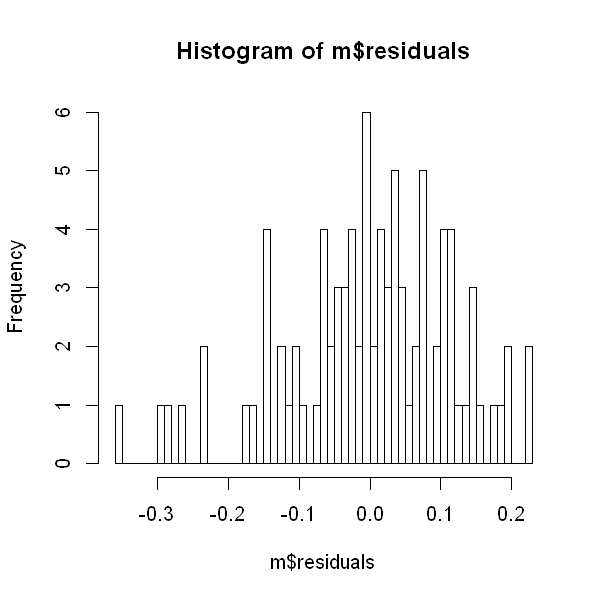

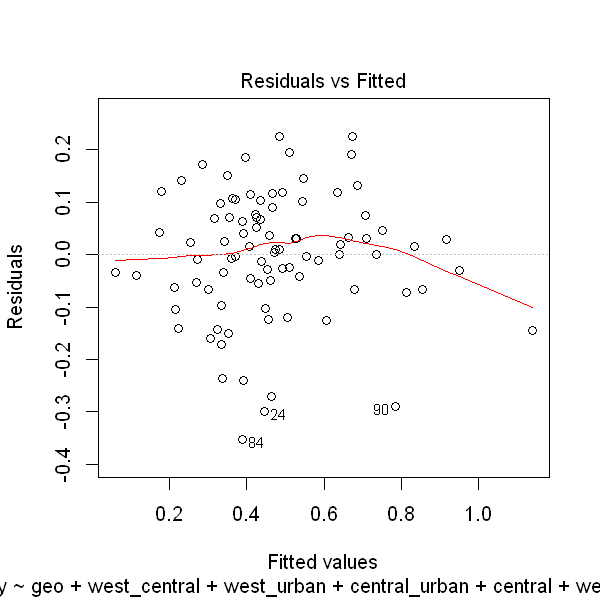

Warning message:
"not plotting observations with leverage one:
  11, 33"

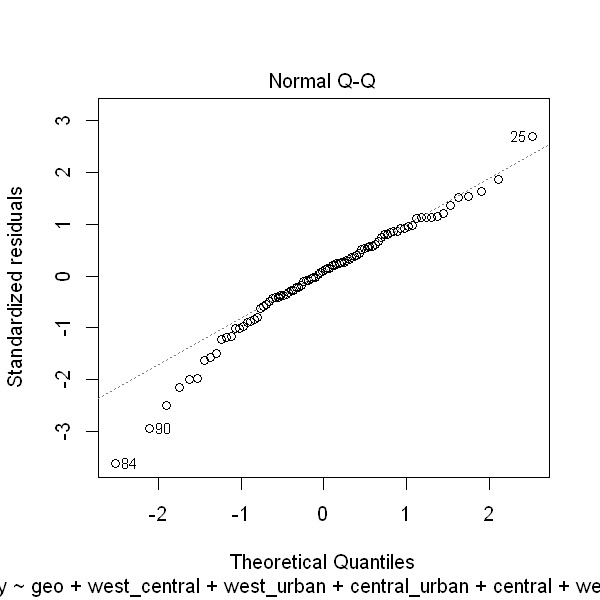

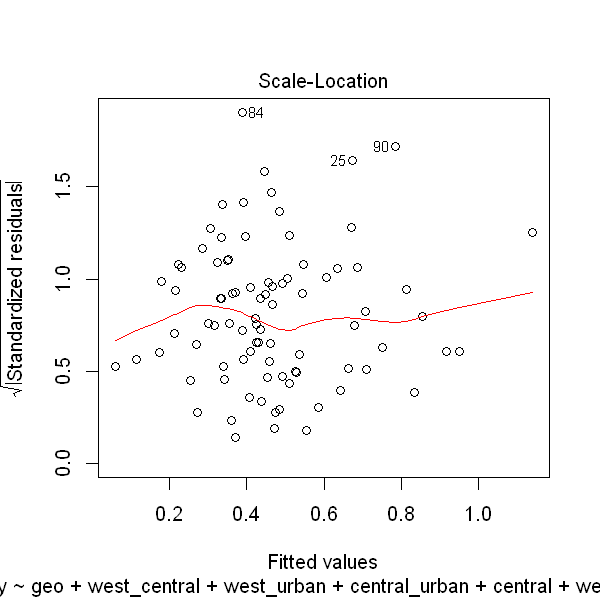

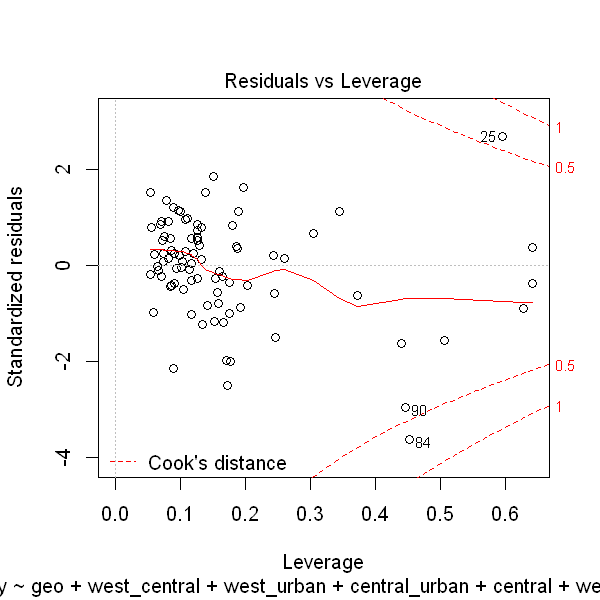

In [83]:
# We have kept all models linear in beta coefficients (MLR 1 satisfied for all models)
# Note that we assume data has been collected as IID (MLR 3 for all models)
evaluate_model_shapiro = function(m) {
    paste("Shapiro test on residuals - test for normality (MLR 6)")
    # null hypothesis is residuals are normally distributed
    shapiro.test(m$residuals)
}

evaluate_model_bp = function(m) {
    paste("Breusch Pagan test - test for heteroskedasticity (MLR 5)")
    # null hypothesis is homoskedasticity, alt is presence of heteroskedasticity
    bptest(m)
}


evaluate_model_plots = function(m) {

    paste("Plotting residuals - test for normality of errors (MLR 6)")
    hist(m$residuals, breaks=50)

    paste("Diagnostic plots (MLR 4,5 - Residual vs fitted), (MLR6 - QQ Plot), (MLR5 - Std. Residuals), (Cooks Dist - Outliers test)")
    plot(m)
    
}

evaluate_model_shapiro(model)
evaluate_model_bp(model)
evaluate_model_plots(model)

In [84]:
# Always use heteroskedasticity robust std errors for beta values
# Get the coefficients for the variables in the model
coeftest(model, vcov = vcovHC)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)
(Intercept)    4.6048e-01         NA      NA       NA
west_central  -8.1293e-02         NA      NA       NA
west_urban     3.0584e-01         NA      NA       NA
central_urban -7.4478e-02         NA      NA       NA
central       -6.4459e-02         NA      NA       NA
west          -1.2922e-01         NA      NA       NA
urban         -2.3971e-01         NA      NA       NA
density        6.0028e-02         NA      NA       NA
density_ymle   6.1194e+01         NA      NA       NA
pctmin80       2.6037e-03         NA      NA       NA
prbarr        -5.3654e-01         NA      NA       NA
prbconv       -2.1255e-01         NA      NA       NA
prbpris        5.7476e-02         NA      NA       NA
avgsen        -3.0200e-03         NA      NA       NA
polpc          8.4523e+01         NA      NA       NA
wtotal        -3.9654e-06         NA      NA       NA
taxpc         -2.3390e-04         NA      NA       NA


In [85]:
# Because we are building a causal model, we need to prove exogeneity, ie E(u) = 0 and Cov(u, X) = 0
# finally plot the models and compare models with stargazer - see video 11.17 on how to do this
vcovHC(model)

,(Intercept),west_central,west_urban,central_urban,central,west,urban,density,density_ymle,pctmin80,prbarr,prbconv,prbpris,avgsen,polpc,wtotal,taxpc
(Intercept),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
west_central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
west_urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
central_urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density_ymle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pctmin80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
